In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.7.1+cu128
True


In [2]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce RTX 4070


**Dependences**

In [3]:
import cv2
import os
import shutil
import random 
from matplotlib import pyplot as plt 
import numpy as np
from PIL import Image

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

**Create folder structure**

In [5]:
# Chemins vers les dossiers
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

# Création des dossiers s’ils n'existent pas déjà
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

**Labelled Faces**

In [ ]:
# from sklearn.datasets import fetch_lfw_people

In [ ]:
# lfw_people = fetch_lfw_people(min_faces_per_person=1, resize=1.0, color=True)

In [ ]:
# for i, image in enumerate(lfw_people.images):
#     # Convertir l'image en format PIL
#     img = Image.fromarray((image * 255).astype(np.uint8))
#     # Enregistrer l'image dans le dossier positif
#     img.save(os.path.join(NEG_PATH, f'person_{i}.jpg'))

**Positive and Anchor dataset**

In [9]:
import uuid

In [ ]:
# # Ouvre la webcam
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# cap = cv2.VideoCapture(0)  # 0 pour webcam intégrée

# # Coordonnées et taille du cadre
# x, y, w, h = 200, 120, 250, 250

# print("Appuie sur 'a' pour une image anchor, 'p' pour positive, 'q' pour quitter.")

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         continue

#     # Affiche un cadre vert autour de la zone d'intérêt
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # conversion pour détection
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
    
#     if len(faces) > 0:
#         # On prend le plus grand visage détecté (au cas où il y en a plusieurs)
#         faces = sorted(faces, key=lambda f: f[2] * f[3], reverse=True)
#         (x, y, w, h) = faces[0]

#         # Affiche la fenêtre plus grande
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     cv2.imshow('Image Collection', frame)

#     key = cv2.waitKey(1) & 0xFF

#     if key == ord('a'):
#         cropped = frame[y:y + h, x:x + w]
#         imgname = os.path.join(ANC_PATH, f"{uuid.uuid1()}.jpg")
#         cv2.imwrite(imgname, cropped)
#         print(f"[ANCHOR] Image enregistrée : {imgname}")

#     elif key == ord('p'):
#         cropped = frame[y:y + h, x:x + w]
#         imgname = os.path.join(POS_PATH, f"{uuid.uuid1()}.jpg")
#         cv2.imwrite(imgname, cropped)
#         print(f"[POSITIVE] Image enregistrée : {imgname}")

#     elif key == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

Appuie sur 'a' pour une image anchor, 'p' pour positive, 'q' pour quitter.
[POSITIVE] Image enregistrée : data\positive\066be7b7-75cf-11f0-9094-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\0695639b-75cf-11f0-bda2-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\06c3d41e-75cf-11f0-af47-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\06ef0973-75cf-11f0-a00a-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\07257a2d-75cf-11f0-b299-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\074f0cb0-75cf-11f0-a14c-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\0771619b-75cf-11f0-8687-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\079a982b-75cf-11f0-b6a3-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\07bcbcee-75cf-11f0-8ca7-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\07e66de9-75cf-11f0-bcbc-e636fc4fc5e9.jpg
[POSITIVE] Image enregistrée : data\positive\080de039-75cf-11f0-b

**Data augmentation**

In [10]:
from torchvision import transforms

In [8]:
augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.02, contrast=0.4, saturation=0.1),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.2),
    transforms.ToTensor()
])

In [ ]:
# def augment_images_in_folder(folder_path, augment_times=5):
#     """Applique la data augmentation sur toutes les images d'un dossier"""
#     files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))]

#     for file in files:
#         img_path = os.path.join(folder_path, file)
#         img = Image.open(img_path).convert('RGB')

#         for _ in range(augment_times):
#             augmented_img = augment(img)
#             save_img = transforms.ToPILImage()(augmented_img)
#             save_img.save(os.path.join(folder_path, f"{uuid.uuid1()}.jpg"))

#         print(f"[OK] Augmentation faite pour {file}")

In [ ]:
# if __name__ == "__main__":
#     print("📸 Début augmentation des images...")
#     augment_images_in_folder(ANC_PATH, augment_times=5)
#     augment_images_in_folder(POS_PATH, augment_times=5)
#     print("✅ Augmentation terminée !")

📸 Début augmentation des images...
[OK] Augmentation faite pour 0034f184-75ce-11f0-b39f-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 00685d5d-75ce-11f0-84ac-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 009acb34-75ce-11f0-b6fb-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 00d89feb-75ce-11f0-b25e-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 01095ffe-75ce-11f0-a342-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 013933a1-75ce-11f0-bc6d-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 016643c2-75ce-11f0-b9cf-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 0194a864-75ce-11f0-b3d2-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 01ccecb9-75ce-11f0-aa09-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 021881e2-75ce-11f0-afee-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 02614686-75ce-11f0-b593-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 028db5df-75ce-11f0-8d0b-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 02bc02bc-75ce-11f0-88ef-e636fc4fc5e9.jpg
[OK] Augmentation faite pour 02ea7dcb-75ce-11f0-89fb-e6

In [11]:
from PIL import Image

In [ ]:
# def apercu_augmentation(image_path):
#     """Affiche l'image originale et une version augmentée côte à côte"""
#     img = Image.open(image_path).convert('RGB')

#     # Applique une seule fois la transformation définie
#     augmented_img = augment(img)
#     augmented_img = transforms.ToPILImage()(augmented_img)

#     # Affichage
#     fig, axes = plt.subplots(1, 2, figsize=(8, 4))
#     axes[0].imshow(img)
#     axes[0].set_title("Originale")
#     axes[0].axis("off")

#     axes[1].imshow(augmented_img)
#     axes[1].set_title("Augmentée")
#     axes[1].axis("off")

#     plt.tight_layout()
#     plt.show()

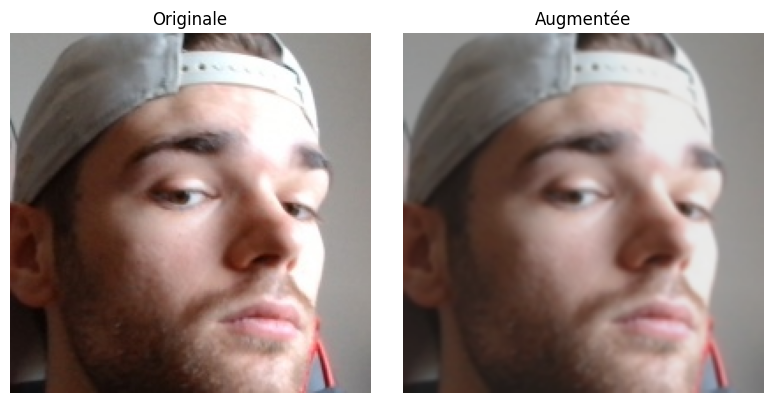

In [ ]:
# # Exemple : aperçu sur la première image des anchors
# exemple_img = os.path.join(ANC_PATH, os.listdir(ANC_PATH)[0])
# apercu_augmentation(exemple_img)

**Load / Preprocess Images**

In [12]:
from glob import glob

In [13]:
# Récupère les chemins vers les fichiers .jpg
anchor_paths = glob(os.path.join(ANC_PATH, '*.jpg'))[:3000]
positive_paths = glob(os.path.join(POS_PATH, '*.jpg'))[:3000]
negative_paths = glob(os.path.join(NEG_PATH, '*.jpg'))[:3000]

In [14]:
# Affiche un chemin pour test
print(anchor_paths[0])

data\anchor\0034f184-75ce-11f0-b39f-e636fc4fc5e9.jpg


**Preprocessing**

In [15]:
preprocess = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),  # Convertit en [0, 1] automatiquement
])

In [ ]:
# img_path = os.path.join('data', 'anchor', '0034f184-75ce-11f0-b39f-e636fc4fc5e9.jpg')
# img = Image.open(img_path).convert('RGB')
# img = preprocess(img)

In [ ]:
# # Vérifier que les pixels sont bien entre 0 et 1
# print(img.shape)  # Résultat : torch.Size([3, 100, 100])
# print(img.min().item())  # Résultat : 0.0
# print(img.max().item())  # Résultat : 1.0 (ou proche)

torch.Size([3, 100, 100])
0.007843137718737125
1.0


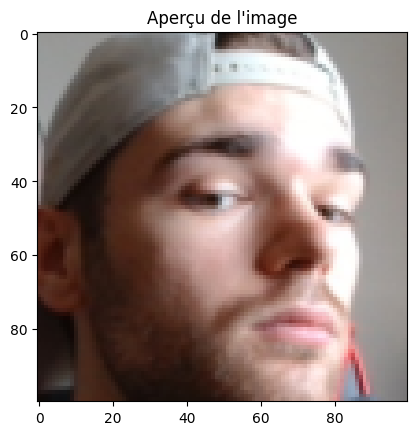

In [ ]:
# plt.imshow(img.permute(1, 2, 0))  # Permute pour afficher en RGB
# # plt.imshow(img.numpy())
# plt.title("Aperçu de l'image")
# plt.show()

**Create Dataset**

In [ ]:
# # (anchor, positive) => 1,1,1,1,1
# # (anchor, negative) => 0,0,0,0,0
# # Labels
# positive_labels = [1] * len(anchor_paths)
# negative_labels = [0] * len(anchor_paths)

In [ ]:
# # Création des tuples : (anchor, other, label)
# positives = list(zip(anchor_paths, positive_paths, positive_labels))
# negatives = list(zip(anchor_paths, negative_paths, negative_labels))

In [ ]:
# # Fusion des deux types de paires
# data = positives + negatives

In [ ]:
# # Exemple : affichage d’une paire
# example = data[0]
# print(example)

('data\\anchor\\0034f184-75ce-11f0-b39f-e636fc4fc5e9.jpg', 'data\\positive\\066be7b7-75cf-11f0-9094-e636fc4fc5e9.jpg', 1)


**Dataset Random**

In [ ]:
# anchor_dir = 'data/anchor'
# positives_dir = 'data/positive'
# negatives_dir = 'data/negative'

In [ ]:
# anchors = os.listdir(anchor_dir)
# positives = os.listdir(positives_dir)
# negatives = os.listdir(negatives_dir)

In [ ]:
# num_pairs = 3000

# pairs = []

In [ ]:
# # Paires positives
# for _ in range(num_pairs):
#     a = random.choice(anchors)
#     p = random.choice(positives)
#     pairs.append([f'{anchor_dir}/{a}', f'{positives_dir}/{p}', 1])

In [ ]:
# # Paires négatives
# for _ in range(num_pairs):
#     a = random.choice(anchors)
#     n = random.choice(negatives)
#     pairs.append([f'{anchor_dir}/{a}', f'{negatives_dir}/{n}', 0])

In [ ]:
# # Mélange
# random.shuffle(pairs)

In [ ]:
# example = pairs[0]
# print(example)  # Affiche la première paire pour vérification

['data/anchor/0f6b3073-75d1-11f0-9880-e636fc4fc5e9.jpg', 'data/positive/11b78495-75d1-11f0-a0df-e636fc4fc5e9.jpg', 1]


**Build / Train / Test Partition**

In [ ]:
# def preprocess_twin(path1, path2, label, transform):
#     img1 = Image.open(path1).convert("RGB")
#     img2 = Image.open(path2).convert("RGB")
#     return transform(img1), transform(img2), torch.tensor(label, dtype=torch.float32)

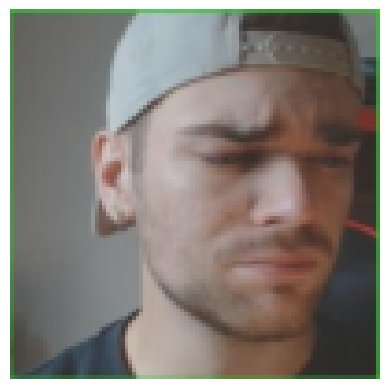

1.0


In [ ]:
# img1, img2, label = preprocess_twin(*example, transform=preprocess)

# # Affichage
# plt.imshow(transforms.ToPILImage()(img2))
# plt.axis('off')
# plt.show()

# print(label.item())  # 1.0 ou 0.0

In [32]:
from torch.utils.data import Dataset

In [33]:
class SiameseDataset(Dataset):
    def __init__(self, pairs, transform=None):
        self.pairs = pairs
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        path1, path2, label = self.pairs[idx]
        return preprocess_twin(path1, path2, label, self.transform)

In [34]:
from torch.utils.data import DataLoader, random_split

In [ ]:
# # Création du dataset complet
# full_dataset = SiameseDataset(pairs, transform=preprocess)

In [ ]:
# # Split 70/30
# train_size = int(0.7 * len(full_dataset))
# test_size = len(full_dataset) - train_size
# train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

In [ ]:
# # Dataloaders
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
# test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0)

In [ ]:
# # Teste un échantillon du dataset sans DataLoader
# img1, img2, label = train_dataset[0]
# print(img1.shape, img2.shape, label)

torch.Size([3, 100, 100]) torch.Size([3, 100, 100]) tensor(0.)


In [ ]:
# # Test DataLoader
# batch = next(iter(train_loader))
# img1_batch, img2_batch, labels_batch = batch

# print("Image 1 batch shape :", img1_batch.shape)  # [16, 3, 100, 100]
# print("Image 2 batch shape :", img2_batch.shape)  # [16, 3, 100, 100]
# print("Labels shape :", labels_batch.shape)       # [16]

Image 1 batch shape : torch.Size([16, 3, 100, 100])
Image 2 batch shape : torch.Size([16, 3, 100, 100])
Labels shape : torch.Size([16])


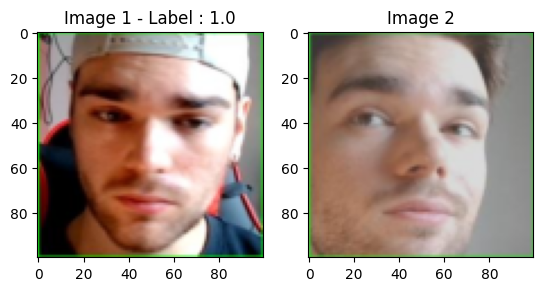

In [ ]:
# # Affichage d'un exemple
# plt.subplot(1, 2, 1)
# plt.imshow(img1_batch[0].permute(1, 2, 0))
# plt.title(f"Image 1 - Label : {labels_batch[0].item()}")

# plt.subplot(1, 2, 2)
# plt.imshow(img2_batch[0].permute(1, 2, 0))
# plt.title("Image 2")
# plt.show()

**Embedding Layer**

In [9]:
class EmbeddingNetwork(nn.Module):
    def __init__(self):
        super(EmbeddingNetwork, self).__init__()
        # First block
        self.conv1 = nn.Conv2d(3, 64, kernel_size=10)  # entrée RGB = 3 canaux
        self.pool1 = nn.MaxPool2d(2, stride=2, padding=0)
        
        # Second block
        self.conv2 = nn.Conv2d(64, 128, kernel_size=7)
        self.pool2 = nn.MaxPool2d(2, stride=2, padding=0)
        
        # Third block
        self.conv3 = nn.Conv2d(128, 128, kernel_size=4)
        self.pool3 = nn.MaxPool2d(2, stride=2, padding=0)
        
        # Final embedding block
        self.conv4 = nn.Conv2d(128, 256, kernel_size=4)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 5 * 5, 4096)  # dépend de la taille finale
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = torch.relu(self.conv3(x))
        x = self.pool3(x)
        
        x = torch.relu(self.conv4(x))
        # print("Shape before flattening:", x.shape)
        x = self.flatten(x)
        # print("Shape after flattening:", x.shape)
        x = self.sigmoid(self.fc1(x))
        return x

In [ ]:
# Création du modèle
embedding = EmbeddingNetwork()
print(embedding)

# Test rapide pour vérifier les dimensions
test_input = torch.randn(1, 3, 100, 100)  # batch=1, RGB, 100x100
test_output = embedding(test_input)
print("Embedding output shape:", test_output.shape)

EmbeddingNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(10, 10), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  (sigmoid): Sigmoid()
)
Embedding output shape: torch.Size([1, 4096])


**L1 Distant**

In [11]:
class L1Distance(nn.Module):
    def __init__(self):
        super(L1Distance, self).__init__()
    
    def forward(self, input, valid):
        return torch.abs(input - valid)

In [ ]:
# l1 = L1Distance()

# emb1 = torch.tensor([[1.0, 2.0, 3.0]])
# emb2 = torch.tensor([[2.0, 0.0, 4.0]])
# print(l1(emb1, emb2))  # Affiche la distance L1 entre les deux embeddings

tensor([[1., 2., 1.]])


In [ ]:
# # Simulons deux embeddings venant du réseau
# anchor_embedding = torch.randn(1, 4096)
# validation_embedding = torch.randn(1, 4096)

# output = l1(anchor_embedding, validation_embedding)
# print("L1 distance output shape:", output.shape)
# print(output[:5])  # Affiche les 5 premières valeurs

L1 distance output shape: torch.Size([1, 4096])
tensor([[1.3538, 0.0125, 0.8715,  ..., 0.5587, 3.7391, 0.0347]])


**Siamese Model**

In [ ]:
# def make_siamese_model(embedding, embedding_output_dim):
#     """
#     Crée un modèle Siamese avec un réseau d'embedding et une couche de distance L1.
    
#     Args:
#         embedding: Le modèle d'embedding à utiliser.
#         embedding_output_dim: La dimension de sortie de l'embedding.
        
#     Returns:
#         Un modèle Siamese.
#     """
#     class SiameseNetwork(nn.Module):
#         def __init__(self):
#             super(SiameseNetwork, self).__init__()
#             self.embedding = embedding  # Ton modèle embedding déjà défini
#             self.l1_dist = L1Distance()
#             self.classifier = nn.Linear(embedding_output_dim, 1)  # embedding_output_dim = taille de l'embedding
        
#         def forward(self, input_image, validation_image):
#             inp_embedding = self.embedding(input_image)  # (batch_size, embedding_output_dim)
#             val_embedding = self.embedding(validation_image)
            
#             distances = self.l1_dist(inp_embedding, val_embedding)  # (batch_size, embedding_output_dim)
#             logits = self.classifier(distances)  # (batch_size, 1)
#             output = torch.sigmoid(logits)
#             return output
        
#     return SiameseNetwork()

In [ ]:
# siamese_model = make_siamese_model(EmbeddingNetwork(), 128)

In [8]:
class SiameseNetwork(nn.Module):
    def __init__(self, embedding_model):
        super(SiameseNetwork, self).__init__()
        self.embedding = embedding_model  # Ton modèle d'embedding déjà défini
        self.l1_dist = L1Distance()           # La classe qu'on vient de créer
        self.classifier = nn.Sequential(
            nn.Linear(4096, 1),
            nn.Sigmoid()
        )

    def forward(self, input_img, validation_img):
        # Passe les deux images dans le réseau d'embedding
        embed1 = self.embedding(input_img)
        embed2 = self.embedding(validation_img)

        # Calcule la distance L1
        distances = self.l1_dist(embed1, embed2)

        # Passe la distance dans la couche de classification
        return self.classifier(distances)

In [ ]:
siamese_model = SiameseNetwork(embedding)

In [ ]:
# # Test rapide
# input_img = torch.randn(1, 3, 100, 100)       # Image anchor
# validation_img = torch.randn(1, 3, 100, 100)  # Image de comparaison

# output = siamese_model(input_img, validation_img)
# print("Siamese model output shape:", output.shape)
# print(output)  # probabilité entre 0 et 1

Siamese model output shape: torch.Size([1, 1])
tensor([[0.5009]], grad_fn=<SigmoidBackward0>)


**Loss / Optimizer**

In [ ]:
binary_cross_entropy = nn.BCELoss()
# binary_cross_entropy = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(siamese_model.parameters(), lr=0.0001)

**Reset weights**

In [ ]:
# def reset_weights(m):
#     if hasattr(m, 'reset_parameters'):
#         m.reset_parameters()

**Checkpoints**

In [ ]:
# checkpoint_dir = 'training_checkpoints'
# checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt.pth")

# os.makedirs(checkpoint_dir, exist_ok=True)

# torch.save({
#     'model_state_dict': model.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
# }, checkpoint_prefix)

**Train step function**

In [ ]:
# for batch in train_loader:
#     print(batch[2].dtype, batch[2].min().item(), batch[2].max().item())
#     break

torch.float32 0.0 1.0


In [ ]:
# test_batch = next(iter(train_loader))
# print(f"Test batch size: {len(test_batch)}")

# X = test_batch[:2]  # Prend les deux premières images du batch
# y = test_batch[2]  # Prend les labels du batch
# y

Test batch size: 3


tensor([1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.])

In [ ]:
def train_step(batch, model, loss_fn=binary_cross_entropy, optimizer=optimizer, device='cuda'):
    # Récupérer images et labels du batch
    input_image, validation_image, label = batch
    # Déplacer les données vers le device (GPU ou CPU)
    input_image, validation_image, label = input_image.to(device), validation_image.to(device), label.to(device)
    
    model.train()
    optimizer.zero_grad()
    
    output = model(input_image, validation_image)
    
    label = label.float().view(-1, 1)  # Assurez-vous que le label a la bonne forme
    loss = loss_fn(output, label)
    # print(f"Loss: {loss.item()}")
    # Backpropagation
    loss.backward()
    optimizer.step()

    return loss.item()

**Build Training**

In [54]:
from sklearn.metrics import precision_score, recall_score
from tqdm import tqdm

In [55]:
def train(dataloader, model, loss_fn=binary_cross_entropy, optimizer=optimizer, device='cuda', EPOCHS=10, checkpoint_dir='training_checkpoints'):
    os.makedirs(checkpoint_dir, exist_ok=True)
    best_precision = 0.0  # meilleur score trouvé
    
    for epoch in range(1, EPOCHS+1):
        print(f"Epoch {epoch}/{EPOCHS}")
        model.train()
        total_loss = 0.0
        all_labels = []
        all_predictions = []
        
        for batch in tqdm(dataloader, desc=f"Training Epoch {epoch}", leave=False):
            loss = train_step(batch, model, loss_fn, optimizer, device)
            total_loss += loss
            
            # Récupérer les labels et les prédictions
            input_image, validation_image, label = batch
            input_image, validation_image = input_image.to(device), validation_image.to(device)
            with torch.no_grad():
                output = model(input_image, validation_image)
                output = torch.round(torch.sigmoid(output)).cpu().numpy()
                all_labels.extend(label.cpu().numpy())
                all_predictions.extend(output)
            
        precision = precision_score(all_labels, all_predictions)
        recall = recall_score(all_labels, all_predictions)
        
        print(f"Loss: {total_loss:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
        
        # Sauvegarde seulement si la précision est meilleure
        if precision > best_precision:
            best_precision = precision
            checkpoint_path = os.path.join(checkpoint_dir, "siamese_best.pth")
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': total_loss,
                'precision': precision,
                'recall': recall
            }, checkpoint_path)
            print(f"✅ Nouveau meilleur modèle sauvegardé (Precision: {precision:.4f})")

**Train**

In [ ]:
# EPOCHS = 10
# device = "cuda"
# siamese_model = siamese_model.to(device)
# train(train_loader, model=siamese_model)

Epoch 1/10


Loss: 1.2420, Precision: 0.6133, Recall: 1.0000
✅ Nouveau meilleur modèle sauvegardé (Precision: 0.6133)
Epoch 2/10


Loss: 0.7996, Precision: 0.7171, Recall: 1.0000
✅ Nouveau meilleur modèle sauvegardé (Precision: 0.7171)
Epoch 3/10


Loss: 0.1167, Precision: 0.7916, Recall: 1.0000
✅ Nouveau meilleur modèle sauvegardé (Precision: 0.7916)
Epoch 4/10


Loss: 0.0622, Precision: 0.8291, Recall: 1.0000
✅ Nouveau meilleur modèle sauvegardé (Precision: 0.8291)
Epoch 5/10


Loss: 0.0443, Precision: 0.8351, Recall: 1.0000
✅ Nouveau meilleur modèle sauvegardé (Precision: 0.8351)
Epoch 6/10


Loss: 0.0280, Precision: 0.8201, Recall: 1.0000
Epoch 7/10


Loss: 0.0208, Precision: 0.8268, Recall: 1.0000
Epoch 8/10


Loss: 0.0168, Precision: 0.8109, Recall: 1.0000
Epoch 9/10


Loss: 0.0143, Precision: 0.8090, Recall: 1.0000
Epoch 10/10


Loss: 0.0104, Precision: 0.7937, Recall: 1.0000


**Real time use**

In [6]:
from PIL import Image, ImageTk
import tkinter as tk

In [12]:
device = "cuda"
siamese_model = SiameseNetwork(embedding).to(device)
checkpoint = torch.load("training_checkpoints/siamese_best.pth", map_location=device)
siamese_model.load_state_dict(checkpoint['model_state_dict'])
siamese_model.eval()

SiameseNetwork(
  (embedding): EmbeddingNetwork(
    (conv1): Conv2d(3, 64, kernel_size=(10, 10), stride=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (fc1): Linear(in_features=6400, out_features=4096, bias=True)
    (sigmoid): Sigmoid()
  )
  (l1_dist): L1Distance()
  (classifier): Sequential(
    (0): Linear(in_features=4096, out_features=1, bias=True)
    (1): Sigmoid()
  )
)

In [ ]:
# Prétraitement image
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def preprocess_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
    
    if len(faces) > 0:
        faces = sorted(faces, key=lambda f: f[2] * f[3], reverse=True)
        (x, y, w, h) = faces[0]
        frame = frame[y:y + h, x:x + w]  # Crop face

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(frame, (100, 100))  # Resize to match model input
    img = img.astype("float32") / 255.0
    img = np.transpose(img, (2, 0, 1))  # HWC → CHW
    img = torch.tensor(img).unsqueeze(0).to(device)
    return img

In [22]:
# Interface Tkinter
root = tk.Tk()
root.title("Reconnaissance Faciale")

# recognition_enabled = False
anchor_img = None

In [23]:
# Webcam
cap = cv2.VideoCapture(0)

In [24]:
# Label vidéo
video_label = tk.Label(root)
video_label.pack()

In [ ]:
# # Boutons
# def toggle_recognition():
#     global recognition_enabled
#     recognition_enabled = not recognition_enabled
#     btn_recognition.config(text="Désactiver reconnaissance" if recognition_enabled else "Activer reconnaissance")

# btn_recognition = tk.Button(root, text="Activer reconnaissance", command=toggle_recognition)
# btn_recognition.pack()


In [25]:
def capture_anchor():
    global anchor_img, frame
    anchor_img = preprocess_frame(frame)
    print("📸 Anchor enregistrée")
    
btn_anchor = tk.Button(root, text="Capturer image référence", command=capture_anchor)
btn_anchor.pack()

In [26]:
def recognize_once():
    global frame, anchor_img
    if anchor_img is None:
        print("⚠️ Aucun anchor enregistré")
        return

    # Capture une seule frame courante
    ret, snapshot = cap.read()
    if not ret:
        print("⚠️ Impossible de capturer l'image")
        return

    # Détection visage (pour enlever le background)
    # gray = cv2.cvtColor(snapshot, cv2.COLOR_BGR2GRAY)
    # faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
    input_img = preprocess_frame(snapshot)

    if input_img is None:
        print("⚠️ Aucun visage détecté")
        return

    # Prend le plus grand visage détecté
    # faces = sorted(faces, key=lambda f: f[2] * f[3], reverse=True)
    # (x, y, w, h) = faces[0]
    # cropped_face = snapshot[y:y + h, x:x + w]

    # Prétraitement pour modèle
    # input_img = preprocess_frame(cropped_face)

    # Inférence
    with torch.no_grad():
        output = siamese_model(anchor_img, input_img)
        pred = (output.item() > 0.7)

    # Résultat
    text = "Match ✅" if pred else "No match ❌"
    print(text)
    print(f"Distance L1 : {output.item()}")

    # Affichage dans l'interface
    # color = (0, 255, 0) if pred else (0, 0, 255)
    # cv2.rectangle(snapshot, (x, y), (x + w, y + h), color, 2)
    # cv2.putText(snapshot, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Convertir pour Tkinter
    img_rgb = cv2.cvtColor(snapshot, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)
    img_tk = ImageTk.PhotoImage(img_pil)
    video_label.img_tk = img_tk
    video_label.config(image=img_tk)
    
btn_recognize_once = tk.Button(root, text="Vérifier reconnaissance", command=recognize_once)
btn_recognize_once.pack()

In [27]:
def update_frame():
    global frame
    ret, frame = cap.read()
    if not ret:
        root.after(10, update_frame)
        return

    display_frame = frame.copy()
    gray = cv2.cvtColor(display_frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
    
    if len(faces) > 0:
        faces = sorted(faces, key=lambda f: f[2] * f[3], reverse=True)
        (x, y, w, h) = faces[0]
        cv2.rectangle(display_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Si reconnaissance activée
    # if recognition_enabled and anchor_img is not None:
    #     input_img = preprocess_frame(frame)
    #     with torch.no_grad():
    #         output = siamese_model(anchor_img, input_img)
    #         pred = (output.item() > 0.5)
    #     text = "Match" if pred else "No match"
    #     color = (0, 255, 0) if pred else (0, 0, 255)
    #     cv2.putText(display_frame, text, (30, 50),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)
    img_tk = ImageTk.PhotoImage(img_pil)

    video_label.img_tk = img_tk
    video_label.config(image=img_tk)

    root.after(10, update_frame)

In [28]:
root.after(10, update_frame)
root.protocol("WM_DELETE_WINDOW", lambda: (cap.release(), root.destroy()))
root.mainloop()
# cap.release()
# cv2.destroyAllWindows()

📸 Anchor enregistrée
📸 Anchor enregistrée
📸 Anchor enregistrée
Match ✅
Distance L1 : 0.9978005290031433
No match ❌
Distance L1 : 1.223767185365432e-07
Match ✅
Distance L1 : 0.9678881168365479
